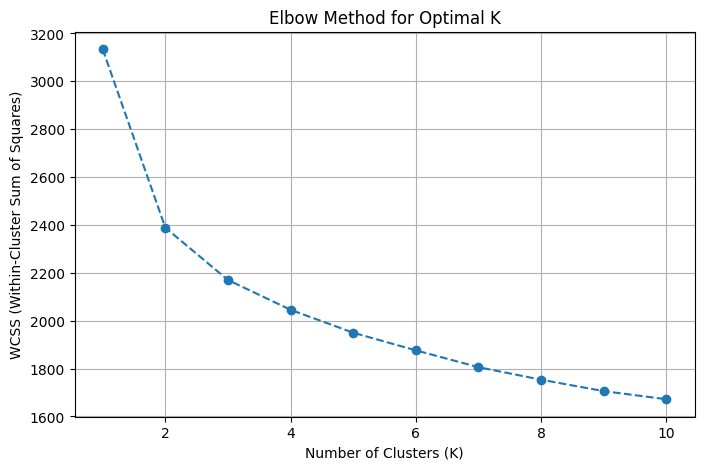

Optimal number of clusters (K): 2


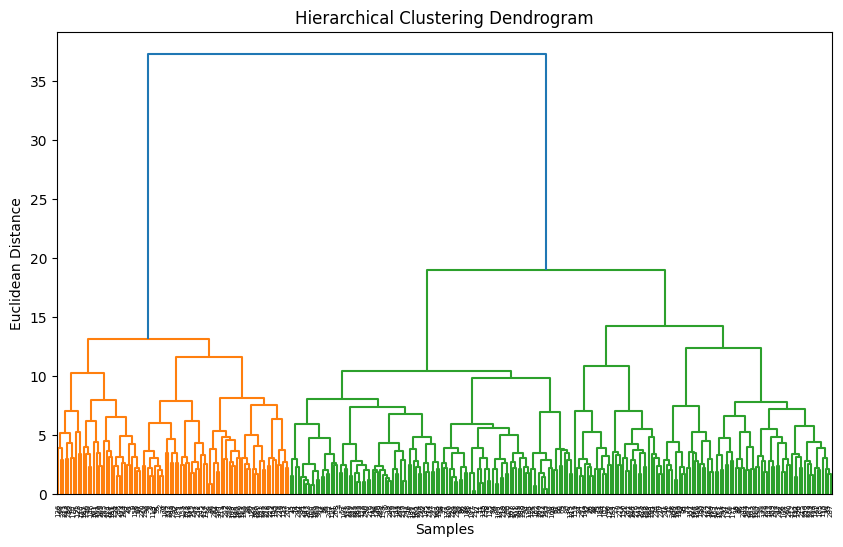

Adjusted Rand Index (ARI): 0.5111249048429322


In [4]:
# 05_unsupervised_learning.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# --- Load preprocessed dataset ---
df_clean = pd.read_csv("heart_disease_clean.csv")

# --- Reduced dataset for clustering ---
X_for_clustering = df_clean.copy()
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
X_for_clustering[continuous_features] = scaler.fit_transform(X_for_clustering[continuous_features])
y_binary = (df_clean["num"] > 0).astype(int)  # 0=no disease, 1=disease

# --- K-Means Elbow Method ---
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

# --- Automatically choose K ---
diffs = np.diff(wcss)
ratios = diffs[1:] / diffs[:-1]
best_k = np.argmin(ratios) + 2
print("Optimal number of clusters (K):", best_k)

# --- Dendrogram ---
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_for_clustering, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# --- K-Means clustering with best K ---
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_for_clustering)

# --- Evaluate clustering ---
ari_score = adjusted_rand_score(y_binary, clusters)
print("Adjusted Rand Index (ARI):", ari_score)
